In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers

pd.options.display.max_rows=10
pd.options.display.float_format="{:.1f}".format

np.set_printoptions(linewidth = 200)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train[2917]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 127, 100, 156, 239, 224, 177, 213, 159,  70,  13,   0,   0

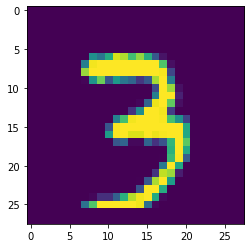

In [4]:
plt.imshow(x_train[2917])

In [5]:
x_train[2917][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  58, 254, 216,  11,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [6]:
x_train[2917][10][16]

58

In [7]:
x_train_normalized=x_train/255.0
x_test_normalized=x_test/255.0
print(x_train_normalized[2900][12])

[0.         0.         0.         0.         0.         0.         0.         0.55294118 0.88627451 0.22352941 0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]


In [8]:
def plot_curve(epochs, hist, list_of_metrics):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    
    for m in list_of_metrics:
        x=hist[m]
        plt.plot(epochs[1:], x[1:], label=m)
        
    plt.legend()

In [13]:
def create_model(my_learning_rate):
    model=tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
    model.add(tf.keras.layers.Dense(units=256, activation="relu"))
    model.add(tf.keras.layers.Dropout(rate=0.3))
    model.add(tf.keras.layers.Dense(units=10, activation="softmax"))
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                 loss="sparse_categorical_crossentropy",
                 metrics=['accuracy'])
    return model

def train_model(model, train_features, train_label, epochs, batch_size=None, validation_split=0.1):
    history=model.fit(x=train_features, y=train_label, batch_size=batch_size, epochs=epochs, shuffle=True, validation_split=validation_split)
    epochs=history.epoch
    hist=pd.DataFrame(history.history)
    
    return epochs, hist

In [ ]:
learning_rate=0.003
epochs=50
batch_size=4000
validation_split=0.2

my_model=create_model(learning_rate)

epochs, hist=train_model(my_model, x_train_normalized, y_train, epochs, batch_size, validation_split)
list_of_metrics_to_plot=['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

print("/n Evaluating against Test set:")
my_model.evaluate(x=x_test_normalized, y=y_test, batch_size=batch_size)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 41us/sample - loss: 0.9977 - accuracy: 0.7070 - val_loss: 0.3659 - val_accuracy: 0.8916
Epoch 2/50
48000/48000 [==============================] - 1s 28us/sample - loss: 0.4008 - accuracy: 0.8804 - val_loss: 0.2780 - val_accuracy: 0.9202
Epoch 3/50
48000/48000 [==============================] - 1s 28us/sample - loss: 0.3023 - accuracy: 0.9104 - val_loss: 0.2331 - val_accuracy: 0.9333
Epoch 4/50
48000/48000 [==============================] - 1s 28us/sample - loss: 0.2516 - accuracy: 0.9274 - val_loss: 0.1996 - val_accuracy: 0.9429
Epoch 5/50
48000/48000 [==============================] - 2s 34us/sample - loss: 0.2158 - accuracy: 0.9381 - val_loss: 0.1773 - val_accuracy: 0.9496
Epoch 6/50
48000/48000 [==============================] - 2s 32us/sample - loss: 0.1901 - accuracy: 0.9449 - val_loss: 0.1597 - val_accuracy: 0.9560
Epoch 7/50
48000/48000 [==============================] 